Random number (0-15): 2


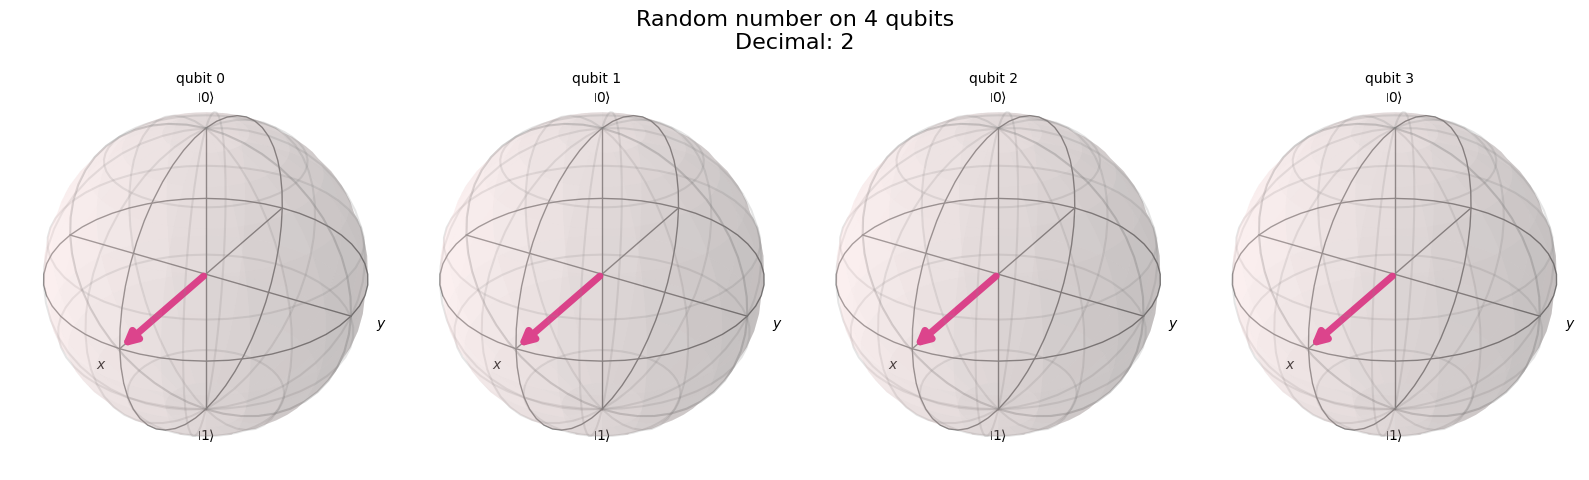

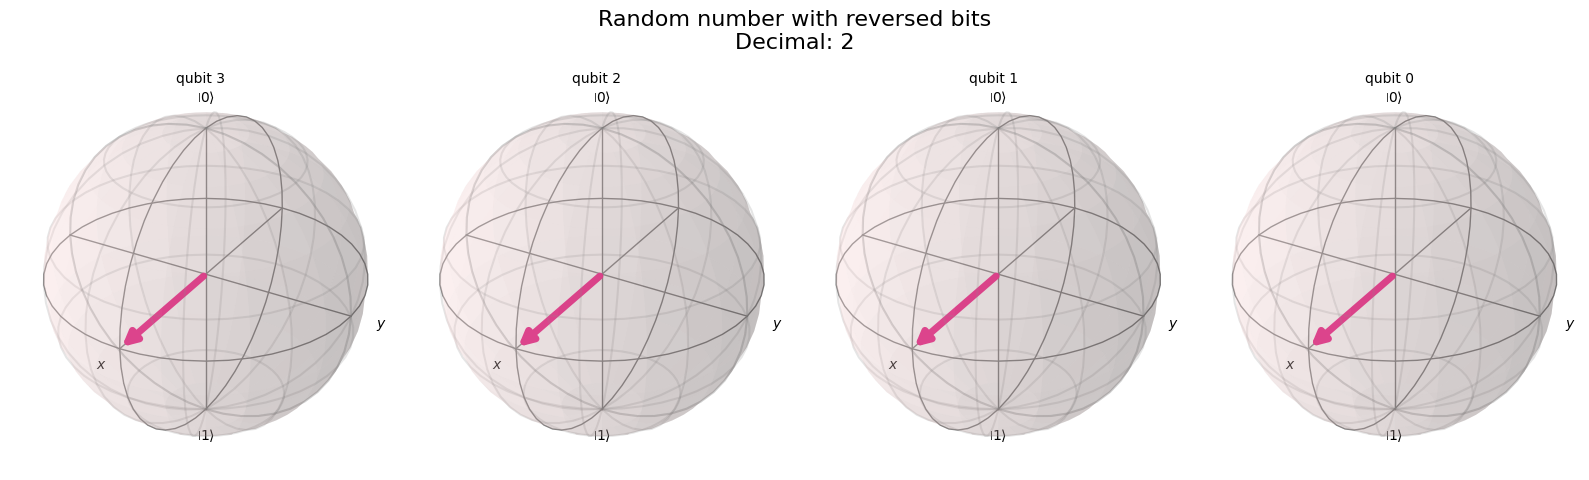

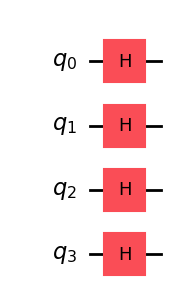

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import random
from IPython.display import display

# Quantum Random Number Generator
def quantum_random_number(num_qubits: int = 4) -> tuple[int, QuantumCircuit, Statevector]:
    """
    Generates a random number using a quantum circuit.

    Args:
        num_qubits (int): Number of qubits to use (max random number = 2^num_qubits - 1)

    Returns:
        decimal (int): Random number
        qc (QuantumCircuit): Quantum circuit used
        state (Statevector): Statevector of the circuit
    """
    # Create circuit
    qc = QuantumCircuit(num_qubits)
    
    # Apply Hadamard gate to all qubits to create superposition
    qc.h(range(num_qubits))
    
    # Get the statevector
    state = Statevector(qc)
    
    # Convert probabilities to a weighted random outcome
    probs = state.probabilities_dict()
    outcomes = list(probs.keys())
    probabilities = list(probs.values())
    
    # Randomly pick a measurement based on quantum probabilities
    random_outcome = random.choices(outcomes, probabilities)[0]
    
    # Convert binary string to integer (little-endian)
    decimal = int(random_outcome[::-1], 2)
    
    return decimal, qc, state

# Parameters
num_qubits = 4 

# Generate random number
rand_num, qc, state = quantum_random_number(num_qubits)

# Outputs
print(f"Random number (0-{2**num_qubits-1}): {rand_num}")

# Display Bloch spheres for each qubit
display(plot_bloch_multivector(state, title=f'Random number on {num_qubits} qubits\nDecimal: {rand_num}'))
display(plot_bloch_multivector(state, title=f'Random number with reversed bits\nDecimal: {rand_num}', reverse_bits=True))

# Draw the quantum circuit
qc.draw('mpl')